estimate the Dominican Republic's PF in the 1980s based on the PNAS data

The COLD approach can provide the Haiti and DR PF proportion comparison, then applied the proportion to the PNAS Haiti PF percentage in the 1980s 

Note: This approach is not recommended by Blair because he thought DR should not have such higher percentage of PF in the 1996. That's one of the reason we need to model the land change separately for Haiti and DR

In [1]:
import numpy as np
import os
from os.path import join
import sys
import matplotlib
import matplotlib.pyplot as plt
import pmdarima as pm
from statsmodels.tsa.ar_model import ar_select_order
from scipy.stats import linregress
import pandas as pd
import matplotlib.ticker as plticker
import seaborn as sns
from osgeo import gdal, gdal_array, gdalconst

pwd = os.getcwd()
rootpath = os.path.abspath(os.path.join(pwd, '..'))

def get_pnas_paper_sheet():
    filename_pnas = join(rootpath, 'data', 'pnas_pf_digitize.csv')
    sheet_pnas = pd.read_csv(filename_pnas)

    return sheet_pnas

In [2]:
def read_obs_pf(land_cover_version='degrade_v2_refine_3_3'):
    """
        read the mapped primary forest for Haiti and Dominican Republic
    """

    filename_pf = join(rootpath, 'data', '{}_landcover_analysis.xlsx'.format(land_cover_version))
    sheet_landcover = pd.read_excel(filename_pf, sheet_name='Haiti')

    array_obs_year = np.arange(1996, 2023)
    array_map_year = sheet_landcover['Year'].values
    mask = np.isin(array_map_year, array_obs_year)

    array_obs_pf_haiti = (sheet_landcover['3 Primary wet forest %'] + sheet_landcover['4 Primary dry forest %']).values[mask]
    array_obs_pf_haiti_count = (sheet_landcover['3 Primary wet forest'] + sheet_landcover['4 Primary dry forest']).values[mask]

    sheet_landcover = pd.read_excel(filename_pf, sheet_name='Dominican')
    array_obs_pf_dr = (sheet_landcover['3 Primary wet forest %'] + sheet_landcover['4 Primary dry forest %']).values[mask]
    array_obs_pf_dr_count = (sheet_landcover['3 Primary wet forest'] + sheet_landcover['4 Primary dry forest']).values[mask]

    sheet_landcover = pd.read_excel(filename_pf, sheet_name='Hispaniola')
    array_obs_pf_hispaniola = (sheet_landcover['3 Primary wet forest %'] + sheet_landcover['4 Primary dry forest %']).values[mask]
    array_obs_pf_hispaniola_count = (sheet_landcover['3 Primary wet forest'] + sheet_landcover['4 Primary dry forest']).values[mask]
    
    return array_obs_year, array_obs_pf_haiti, array_obs_pf_dr, array_obs_pf_hispaniola, array_obs_pf_haiti_count, array_obs_pf_dr_count, array_obs_pf_hispaniola_count

In [3]:
def plot_cold_pnas_pf_pct(array_obs_year, array_cold_pf_haiti, sheet_pnas,
                       title='Haiti PF percentage comparison between multiple approaches'):
    """
        plot the mapped PF percentage in Haiti with different approaches
        (1) COLD approach
        (2) PNAS paper
        (3) Composite land cover
        (4) Composite land cover post-processing following the PNAS paper
    """

    fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(12, 8))
    legend_size = 20
    tick_label_size = 17
    axis_label_size = 20
    title_label_size = 24
    tick_length = 4

    # COLD pct plot
    plt.scatter(array_obs_year, array_cold_pf_haiti * 100, color='#0485d1', marker='.', label='COLD approach', s=150)
    # plt.scatter(list_year_extension, pf_extension, color='#0485d1', marker='*', label='extension based on COLD', s=100)

    # PNAS pct plot
    plt.scatter(sheet_pnas['year'].values, sheet_pnas['digitize_pf_pct (%)'].values, color='#8f1402', marker='^', label='PNAS study', s=50)  # PNAS pct

    axes.tick_params('x', labelsize=tick_label_size, direction='out', length=tick_length, bottom=True, which='major')
    axes.tick_params('y', labelsize=tick_label_size, direction='out', length=tick_length, left=True, which='major')

    axes.set_xlabel('year', size=axis_label_size)
    axes.set_ylabel('PF percentage (%)', size=axis_label_size)

    # axes.yaxis.set_major_locator(plticker.MultipleLocator(base=0.1))
    axes.xaxis.set_major_locator(plticker.MultipleLocator(base=2.0))

    # plt.legend(loc='best', fontsize=legend_size, bbox_to_anchor=(1.04, 1))
    plt.legend(loc='best', fontsize=legend_size)
    plt.title(title, fontsize=title_label_size)
    plt.tight_layout()

    plt.show()


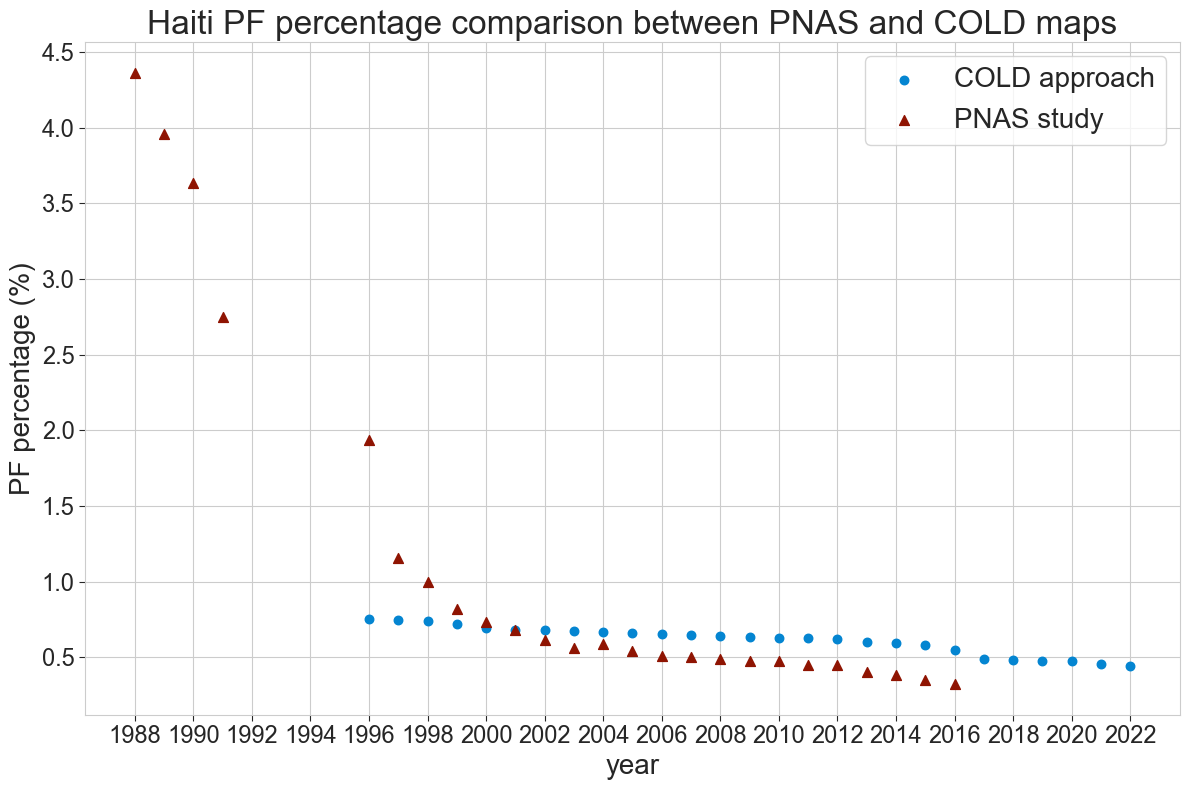

In [4]:
# def main():
if __name__ == '__main__':

    output_version_flag = 'degrade_v2_refine_3_3'

    sheet_pnas = get_pnas_paper_sheet()
    (array_obs_year, array_cold_pf_haiti, array_cold_pf_dr, array_cold_pf_hispaniola,
     array_cold_pf_haiti_count, array_cold_pf_dr_count, array_cold_pf_hispaniola_count) = read_obs_pf(land_cover_version='degrade_v2_refine_3_3')
    
    plot_cold_pnas_pf_pct(array_obs_year, array_cold_pf_haiti, sheet_pnas,
                          title='Haiti PF percentage comparison between PNAS and COLD maps')

In [5]:
    sheet_pnas

,year,digitize_pf_pct (%)
0,1988,4.362412
1,1989,3.960231
2,1990,3.636946
3,1991,2.749840
4,1996,1.937781
5,1997,1.154586
6,1998,0.998717
7,1999,0.821680
8,2000,0.735087
9,2001,0.681206


[0.05957489 0.05963118 0.05978305 0.05935659 0.058023   0.05748501
 0.05733267 0.05725241 0.05704619 0.05750275 0.05798909 0.05778082
 0.05728845 0.05705346 0.0569925  0.05693034 0.05618854 0.05514935
 0.05552916 0.05565521 0.0528273  0.0470398  0.04625728 0.04631201
 0.046275   0.04488995 0.04405639]


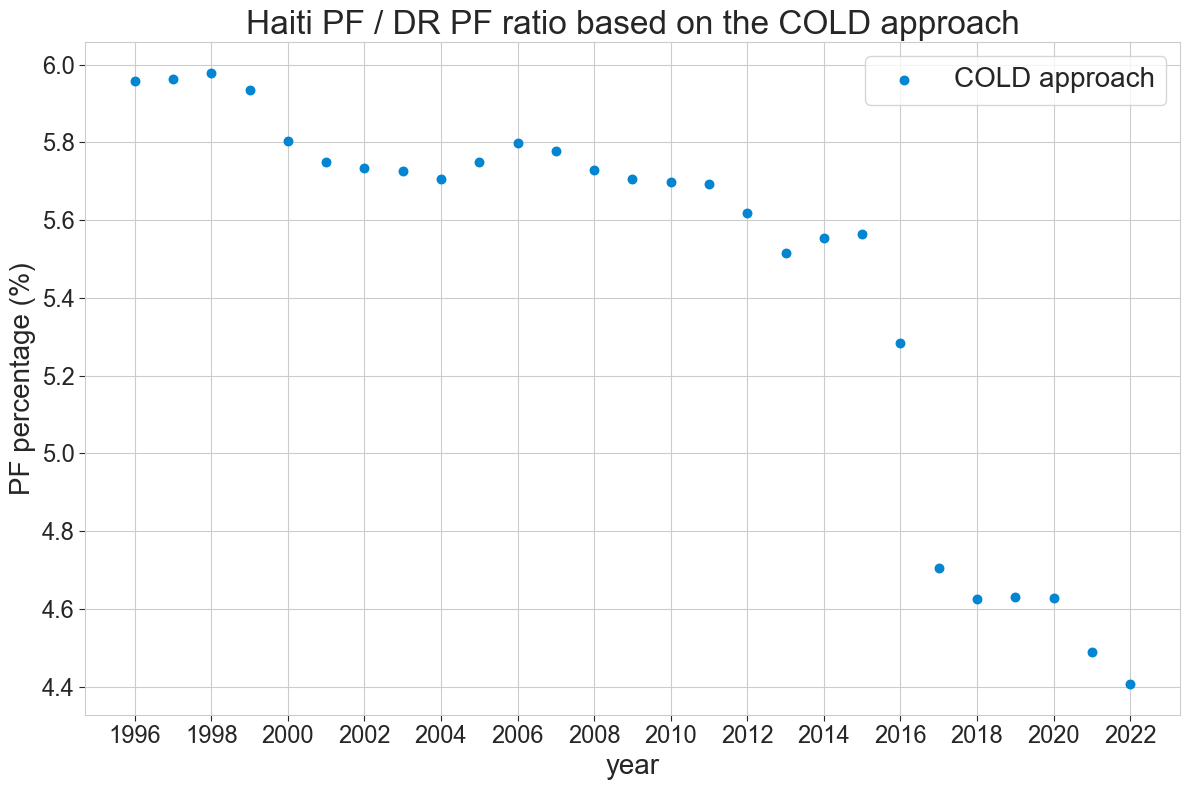

In [6]:
    array_haiti_dr_pf_ratio_count = array_cold_pf_haiti_count / array_cold_pf_dr_count
    print(array_haiti_dr_pf_ratio_count)
    
    title = 'Haiti PF / DR PF ratio based on the COLD approach'
    
    fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(12, 8))
    legend_size = 20
    tick_label_size = 17
    axis_label_size = 20
    title_label_size = 24
    tick_length = 4

    # COLD pct plot
    plt.scatter(array_obs_year, array_haiti_dr_pf_ratio_count * 100, color='#0485d1', marker='.', label='COLD approach', s=150)
    # plt.scatter(list_year_extension, pf_extension, color='#0485d1', marker='*', label='extension based on COLD', s=100)

    axes.tick_params('x', labelsize=tick_label_size, direction='out', length=tick_length, bottom=True, which='major')
    axes.tick_params('y', labelsize=tick_label_size, direction='out', length=tick_length, left=True, which='major')

    axes.set_xlabel('year', size=axis_label_size)
    axes.set_ylabel('PF percentage (%)', size=axis_label_size)

    # axes.yaxis.set_major_locator(plticker.MultipleLocator(base=0.1))
    axes.xaxis.set_major_locator(plticker.MultipleLocator(base=2.0))

    # plt.legend(loc='best', fontsize=legend_size, bbox_to_anchor=(1.04, 1))
    plt.legend(loc='best', fontsize=legend_size)
    plt.title(title, fontsize=title_label_size)
    plt.tight_layout()

    plt.show()

In [7]:
    filename_country_id = join(rootpath, 'data', 'countryid_hispaniola.tif')
    img_country_id = gdal_array.LoadFile(filename_country_id)
    
    pf_count_pnas_haiti = sheet_pnas['digitize_pf_pct (%)'].values * np.count_nonzero(img_country_id == 1)
    print(pf_count_pnas_haiti)
    
    pf_count_dr_adjust_based_on_pnas = pf_count_pnas_haiti / np.nanmax(array_haiti_dr_pf_ratio_count)
    pf_pct_dr_adjust_based_on_pnas = pf_count_dr_adjust_based_on_pnas / np.count_nonzero(img_country_id == 2)

[1.31391959e+08 1.19278627e+08 1.09541595e+08 8.28227279e+07
 5.83642281e+07 3.47751136e+07 3.00804746e+07 2.47482804e+07
 2.21401587e+07 2.05173140e+07 1.84887659e+07 1.69238904e+07
 1.76193962e+07 1.62283785e+07 1.53590025e+07 1.51271755e+07
 1.47794164e+07 1.42577995e+07 1.41998304e+07 1.35622876e+07
 1.34463803e+07 1.21712823e+07 1.15337395e+07 1.04904871e+07
 9.62111732e+06]


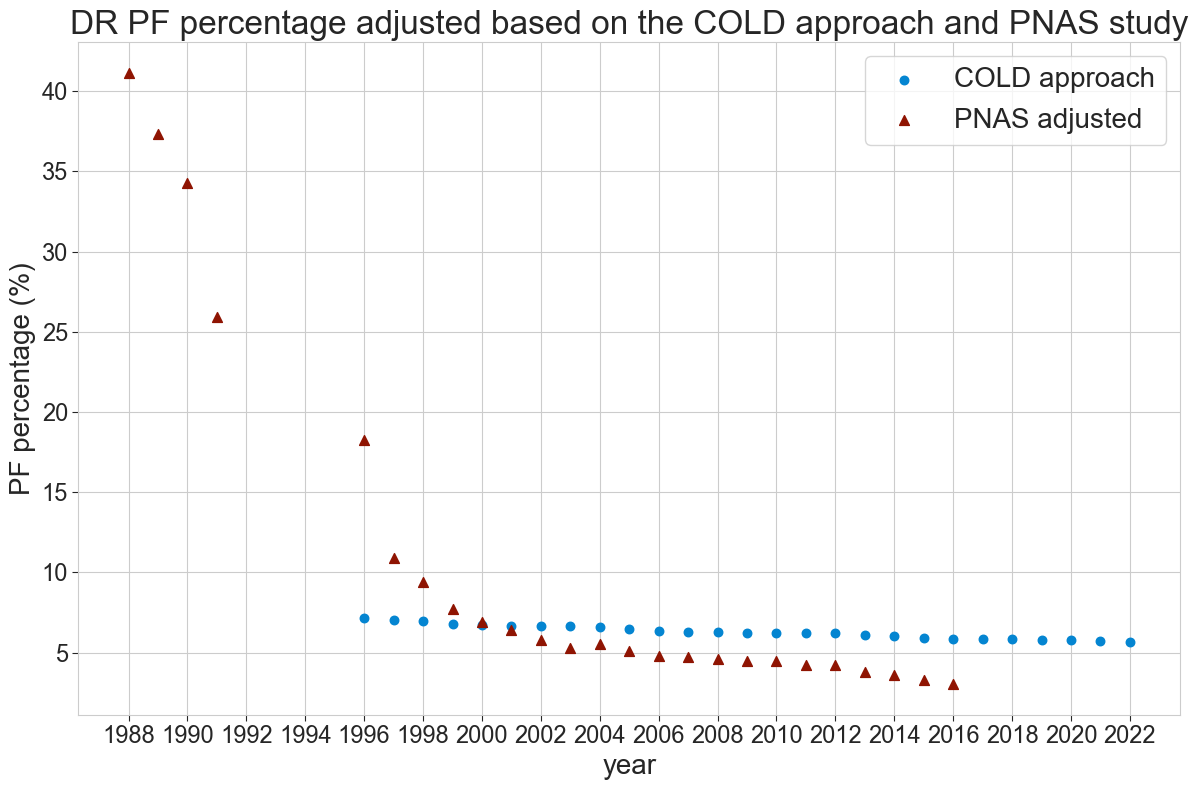

In [8]:
    title = 'DR PF percentage adjusted based on the COLD approach and PNAS study'
    
    fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(12, 8))
    legend_size = 20
    tick_label_size = 17
    axis_label_size = 20
    title_label_size = 24
    tick_length = 4
    
    # COLD pct plot
    plt.scatter(array_obs_year, array_cold_pf_dr * 100, color='#0485d1', marker='.', label='COLD approach', s=150)
    
    # PNAS pct plot
    plt.scatter(sheet_pnas['year'].values, pf_pct_dr_adjust_based_on_pnas, color='#8f1402', marker='^', label='PNAS adjusted', s=50)  # PNAS pct

    axes.tick_params('x', labelsize=tick_label_size, direction='out', length=tick_length, bottom=True, which='major')
    axes.tick_params('y', labelsize=tick_label_size, direction='out', length=tick_length, left=True, which='major')

    axes.set_xlabel('year', size=axis_label_size)
    axes.set_ylabel('PF percentage (%)', size=axis_label_size)

    # axes.yaxis.set_major_locator(plticker.MultipleLocator(base=0.1))
    axes.xaxis.set_major_locator(plticker.MultipleLocator(base=2.0))

    # plt.legend(loc='best', fontsize=legend_size, bbox_to_anchor=(1.04, 1))
    plt.legend(loc='best', fontsize=legend_size)
    plt.title(title, fontsize=title_label_size)
    plt.tight_layout()

    plt.show()

In [9]:
    pf_count_total_pnas_adjust = pf_count_pnas_haiti + pf_count_dr_adjust_based_on_pnas
    print(pf_count_total_pnas_adjust)
    
    pf_pct_hispaniola_pnas_adjust = pf_count_total_pnas_adjust / np.count_nonzero(img_country_id)
    print(pf_pct_hispaniola_pnas_adjust)

[2.32920494e+09 2.11447009e+09 1.94186026e+09 1.46821090e+09
 1.03463141e+09 6.16463647e+08 5.33241079e+08 4.38716474e+08
 3.92481910e+08 3.63713499e+08 3.27753124e+08 3.00012340e+08
 3.12341675e+08 2.87682896e+08 2.72271338e+08 2.68161707e+08
 2.61996929e+08 2.52750148e+08 2.51722520e+08 2.40420704e+08
 2.38365998e+08 2.15762145e+08 2.04460328e+08 1.85966437e+08
 1.70554988e+08]
[27.87640739 25.30641624 23.24058604 17.57185234 12.38268316  7.37796468
  6.38193974  5.25064968  4.69730483  4.35299853  3.9226173   3.59060986
  3.73816989  3.44304852  3.2585998   3.20941487  3.13563354  3.02496615
  3.01266729  2.8774048   2.85281365  2.58228606  2.44702357  2.22568485
  2.04123744]


In [10]:
    pf_pct_hispaniola_pnas_adjust

array([27.87640739, 25.30641624, 23.24058604, 17.57185234, 12.38268316,
        7.37796468,  6.38193974,  5.25064968,  4.69730483,  4.35299853,
        3.9226173 ,  3.59060986,  3.73816989,  3.44304852,  3.2585998 ,
        3.20941487,  3.13563354,  3.02496615,  3.01266729,  2.8774048 ,
        2.85281365,  2.58228606,  2.44702357,  2.22568485,  2.04123744])

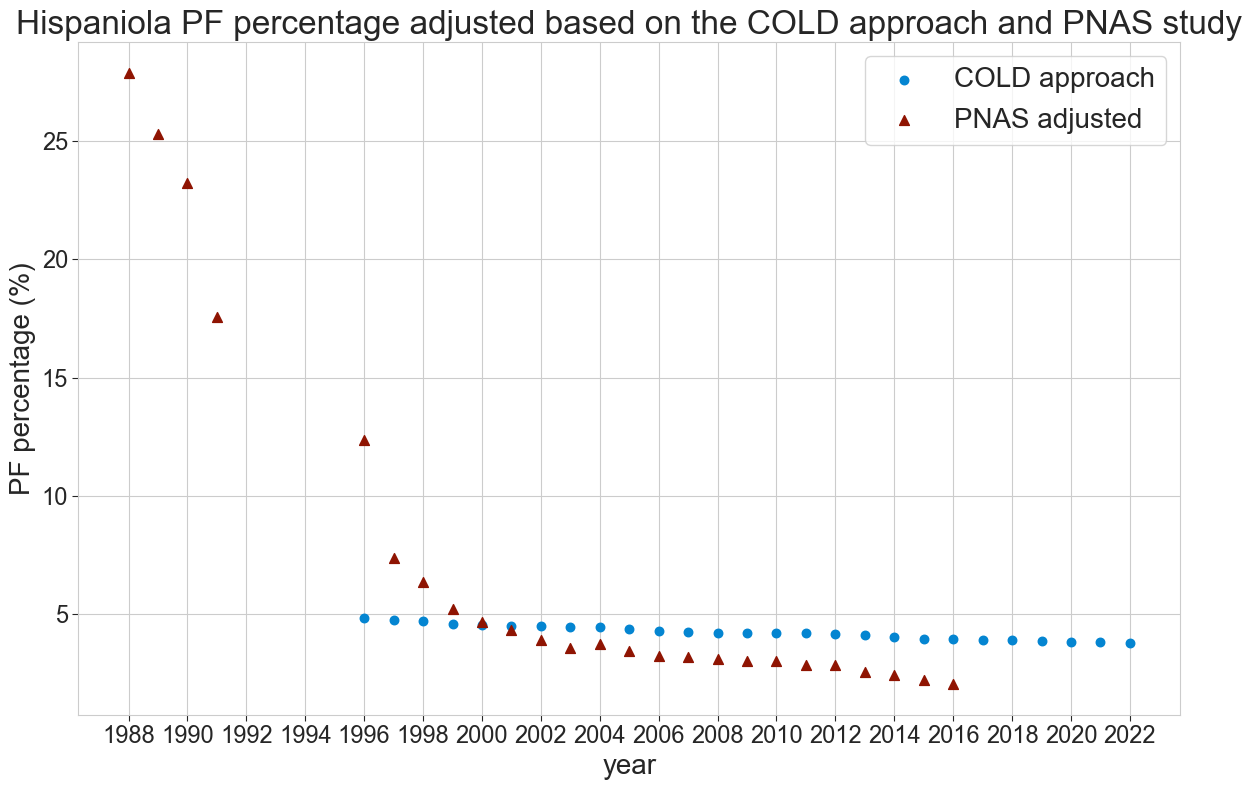

In [11]:
    title = 'Hispaniola PF percentage adjusted based on the COLD approach and PNAS study'
    
    fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(12, 8))
    legend_size = 20
    tick_label_size = 17
    axis_label_size = 20
    title_label_size = 24
    tick_length = 4
    
    # COLD pct plot
    plt.scatter(array_obs_year, array_cold_pf_hispaniola * 100, color='#0485d1', marker='.', label='COLD approach', s=150)
    
    # PNAS pct plot
    plt.scatter(sheet_pnas['year'].values, pf_pct_hispaniola_pnas_adjust, color='#8f1402', marker='^', label='PNAS adjusted', s=50)  # PNAS pct

    axes.tick_params('x', labelsize=tick_label_size, direction='out', length=tick_length, bottom=True, which='major')
    axes.tick_params('y', labelsize=tick_label_size, direction='out', length=tick_length, left=True, which='major')

    axes.set_xlabel('year', size=axis_label_size)
    axes.set_ylabel('PF percentage (%)', size=axis_label_size)

    # axes.yaxis.set_major_locator(plticker.MultipleLocator(base=0.1))
    axes.xaxis.set_major_locator(plticker.MultipleLocator(base=2.0))

    # plt.legend(loc='best', fontsize=legend_size, bbox_to_anchor=(1.04, 1))
    plt.legend(loc='best', fontsize=legend_size)
    plt.title(title, fontsize=title_label_size)
    plt.tight_layout()

    plt.show()

In [12]:
    print(array_cold_pf_haiti)
    print(array_cold_pf_dr)
    print(array_cold_pf_haiti / array_cold_pf_dr)
    print(array_cold_pf_haiti_count / array_cold_pf_dr_count)

[0.00754315 0.00745317 0.00736602 0.00716592 0.0069434  0.00681292
 0.00676381 0.00673941 0.00668682 0.00658472 0.00652433 0.00645175
 0.00636596 0.0063214  0.00629511 0.00627133 0.00617316 0.00597043
 0.00591757 0.00582345 0.00549867 0.00488481 0.00479274 0.00476568
 0.00473068 0.00457059 0.00443556]
[0.0713676  0.07044975 0.06944907 0.06804783 0.06745023 0.06680209
 0.06649682 0.06634978 0.06607001 0.06454468 0.06341633 0.06293691
 0.06263372 0.0624515  0.06225824 0.06209086 0.06192573 0.06102062
 0.06006672 0.05897741 0.05866927 0.058532   0.05840031 0.05800196
 0.0576221  0.05738975 0.05674802]
[0.10569433 0.1057942  0.10606364 0.10530704 0.10294107 0.10198659
 0.10171632 0.10157394 0.10120806 0.10201806 0.10288091 0.1025114
 0.10163787 0.10122097 0.10111282 0.10100252 0.09968646 0.0978428
 0.09851664 0.09874027 0.09372315 0.0834553  0.082067   0.0821641
 0.08209843 0.07964117 0.0781623 ]
[0.05957489 0.05963118 0.05978305 0.05935659 0.058023   0.05748501
 0.05733267 0.05725241 0.05